In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import load_speech_commands

In [2]:
import IPython.display as idp

In [3]:
path = "C:/Users/zhang/Desktop/speech_commands_v0.02"
num = 30000
sr  = 8000
nfft = 256
hoplength  = 128
n_mels = 26
n_mfcc = 13

In [4]:
X, y, labels = load_speech_commands.load_data(path, 30000, sr)

C:/Users/zhang/Desktop/speech_commands_v0.02/.DS_Store  is not a dir
['C:/Users/zhang/Desktop/speech_commands_v0.02/five/004ae714_nohash_0.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/five/00b01445_nohash_0.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/five/00b01445_nohash_1.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/five/00f0204f_nohash_0.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/five/012c8314_nohash_0.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/five/012c8314_nohash_1.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/five/0132a06d_nohash_0.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/five/0132a06d_nohash_1.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/five/0132a06d_nohash_2.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/five/0132a06d_nohash_3.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/five/0132a06d_nohash_4.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/five/0135f3f2_nohash_0.wav', 'C:/Users/zhang/Desktop/speech

['C:/Users/zhang/Desktop/speech_commands_v0.02/two/00b01445_nohash_0.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/two/00b01445_nohash_1.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/two/00b01445_nohash_2.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/two/00f0204f_nohash_0.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/two/00f0204f_nohash_1.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/two/012c8314_nohash_0.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/two/0132a06d_nohash_0.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/two/0132a06d_nohash_1.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/two/0132a06d_nohash_2.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/two/0132a06d_nohash_3.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/two/0132a06d_nohash_4.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/two/0135f3f2_nohash_0.wav', 'C:/Users/zhang/Desktop/speech_commands_v0.02/two/0135f3f2_nohash_1.wav', 'C:/Users/zhang/Desktop/speech_comman

In [5]:
sample = X[0]

In [6]:
idp.Audio(sample, rate=sr)

In [7]:
sample.shape

(8000,)

In [8]:
import mfcc

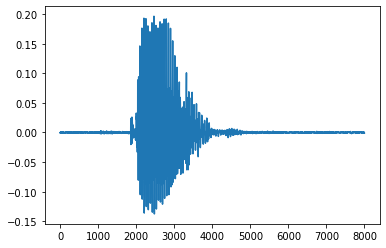

In [21]:
plt.plot(X[3])

In [10]:
sample_mfcc = mfcc.get_mfcc(X[7, :7808], sr, n_fft=nfft, hop_length=hoplength, n_mels=n_mels, mfcc_n=n_mfcc)

In [11]:
sample_mfcc

array([[-4.45074895e+02,  3.88629641e+01,  3.53573746e+01,
         1.35093457e+01,  9.11378907e+00,  1.09489418e+01,
         4.77327077e+00,  6.61715616e+00,  1.10612317e+01,
         1.12956909e+00,  8.76421296e+00, -2.01532602e+00,
        -6.58316826e+00],
       [-4.50202216e+02,  4.08912346e+01,  3.04430011e+01,
         1.74471892e+01,  1.27341940e+01,  1.04822909e+01,
         1.72393385e+00,  3.76692789e+00,  5.65176055e+00,
         1.86124337e+00,  5.22532509e+00,  7.54125966e+00,
         8.82535663e+00],
       [-4.78483967e+02,  3.27329186e+01,  2.09359324e+01,
         1.93168132e+01,  1.45164253e+01,  1.79220503e+01,
         1.26839039e+01,  2.08475579e+01,  6.18025224e+00,
         1.60978953e+00, -1.57342639e+00, -9.54455226e-01,
        -2.81957201e+00],
       [-4.65930168e+02,  4.31557651e+01,  3.31869521e+01,
         2.66370548e+01,  7.19964816e+00,  9.26200921e+00,
         1.08592167e+01,  1.68634226e+01,  9.35700444e+00,
         2.81553834e+00, -2.87612069e

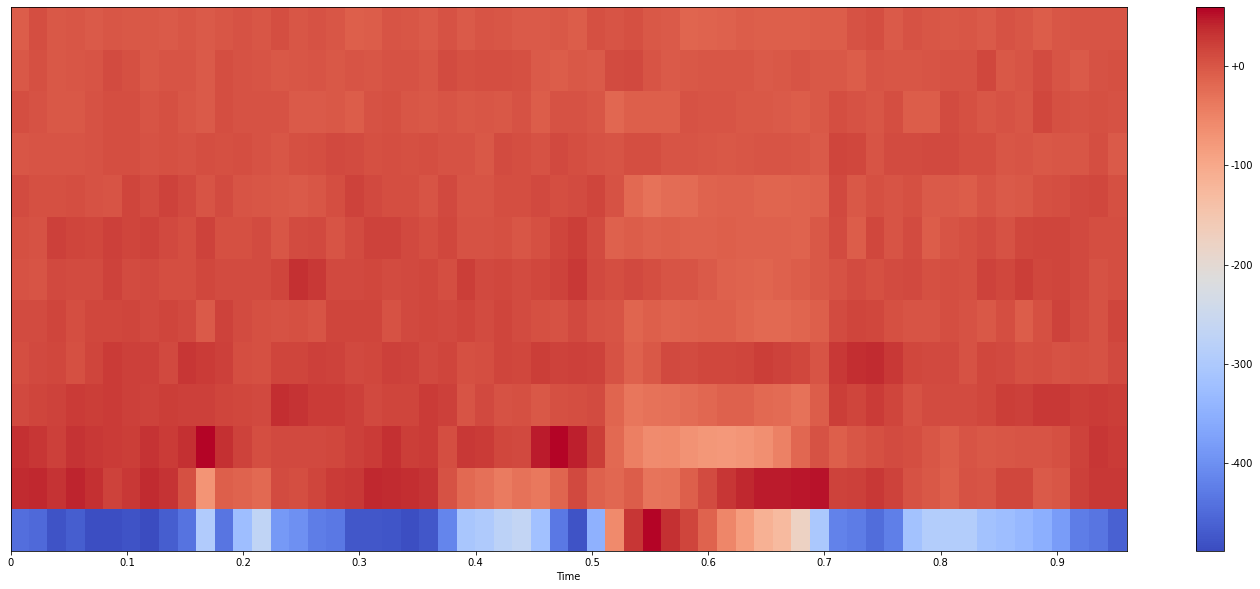

In [12]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(sample_mfcc.T, 
                         hop_length=hoplength,
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

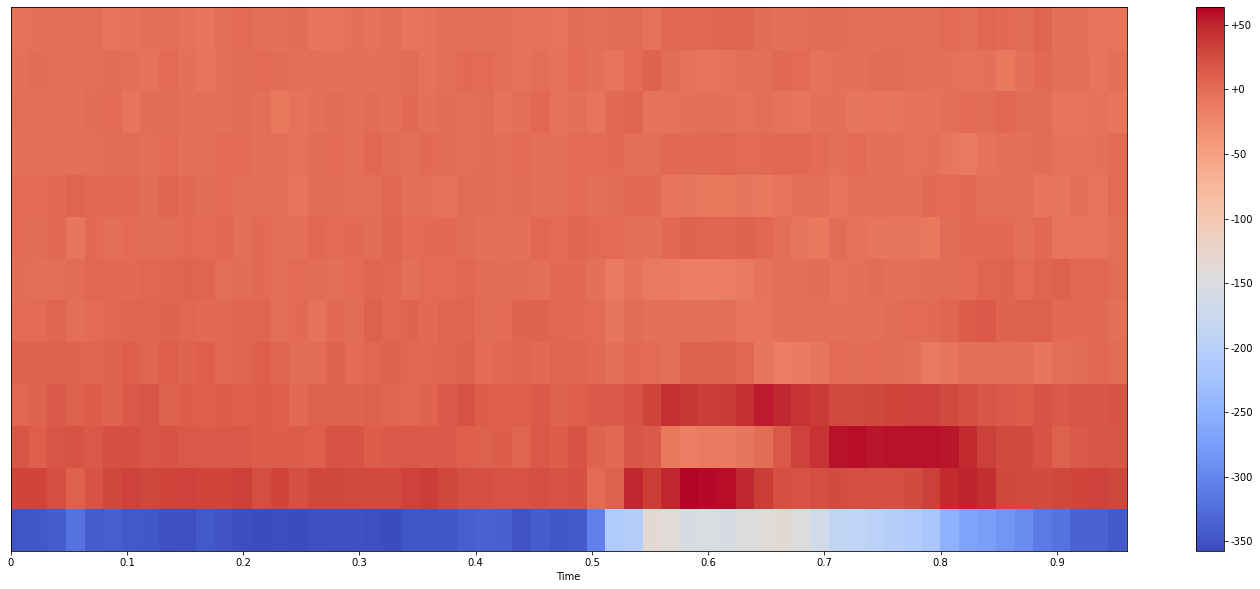

In [13]:
mfccs = librosa.feature.mfcc(y=X[5, :7808].T, n_mfcc=n_mfcc, sr=sr,  center=False, n_fft=nfft, hop_length=hoplength, n_mels=n_mels)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         hop_length=hoplength,
                         sr=sr)
plt.colorbar(format="%+2.f")

In [14]:
MFCCs = np.zeros((num, sample_mfcc.shape[0], sample_mfcc.shape[1]), dtype=np.float32)
MFCCs.shape

(30000, 60, 13)

In [15]:
for i, s in enumerate(X):
    MFCCs[i] = mfcc.get_mfcc(s[:7808], sr, n_fft=nfft, hop_length=hoplength, n_mels=n_mels, mfcc_n=n_mfcc)
    
   # MFCCs[i] = librosa.feature.mfcc(s, n_mfcc=n_mfcc, sr=sr,  center=False, n_fft=nfft, hop_length=hoplength, n_mels=n_mels).T

In [16]:
np.min(MFCCs)

-957.8754

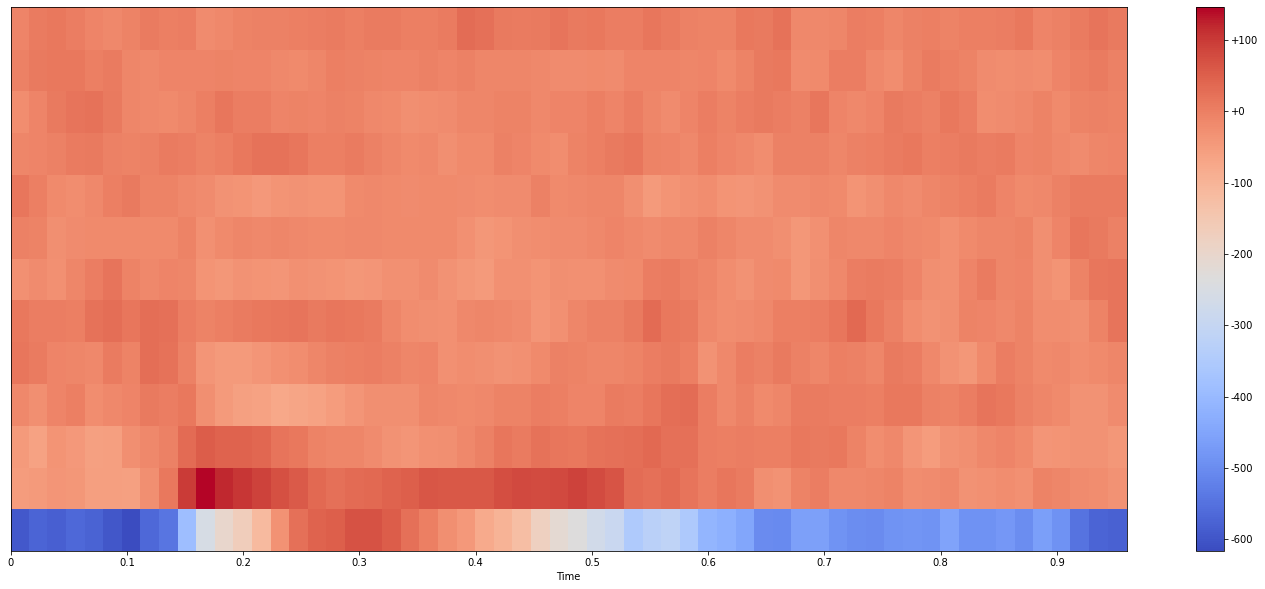

In [17]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(MFCCs[0].T, 
                         x_axis="time", 
                         hop_length=hoplength,
                         sr=sr)
plt.colorbar(format="%+2.f")

In [18]:
np.savez(f"data_set_mfcc_sr_{sr//1000}k_librosa_7808p_ln",  X=MFCCs,  y=y, labels=labels)